In [1]:
import numpy as np
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
# from quimb import *
import time


In [149]:
Nrep=100

def ent_spec(N,phi):
    Nphi=int(phi*N)
    Nt=(N+Nphi)
    v1=np.zeros(Nrep*Nt)

    t_timer=time.time()
    # np.random.seed(1)

    # X=np.zeros((N+Nphi,N+Nphi),dtype=np.complex128)
    for i_r in range(Nrep):
        print(i_r, end='\r')
        #### no symmetry
    #     X[0:Nphi,0:Nphi]=np.random.randn(Nphi,Nphi)+1j*np.random.randn(Nphi,Nphi)
    #     X[0:Nphi,Nphi:]=np.random.randn(Nphi,N)+1j*np.random.randn(Nphi,N)
    #     X[Nphi:,0:Nphi]=np.random.randn(N,Nphi)+1j*np.random.randn(N,Nphi)
    #     X[Nphi:,Nphi:]=np.zeros((N,N))
        X=np.random.randn(Nt,Nt)+1j*np.random.randn(Nt,Nt)
        X[Nphi:,Nphi:]=np.zeros((N,N))

        mat=np.dot(X,np.matrix(X).H)
        rho= mat / np.trace(mat)

        l1=np.linalg.eigvalsh(rho)
        v1[i_r*Nt:(i_r+1)*Nt] = Nt*l1

    elapsed = time.time() - t_timer
    print("Finished, elapsed time = %.2f " % (elapsed)+ "sec")
    
    return v1

In [150]:
N=100
g=(1+sqrt(5))/2
vg=ent_spec(N,phi=g)
v1=ent_spec(N,phi=1)

# plt.figure(figsize=(4.8,3.6))
# fsize=9
# plt.rcParams.update({'font.size': fsize})
# num_bins = 1000

# n, bin_edges = np.histogram(v1, bins=num_bins)

# bins_center1= (bin_edges[0:num_bins]+ bin_edges[1:])/2
# n1= n/np.sum(n) #/(bin_edges[1]-bin_edges[0])
# plt.loglog(bins_center,n,'o',markersize=2)
# plt.loglog(bins_center,3e-5*bins_center**(-0.5),color='C0')
# plt.loglog(bins_center1,n1,'o',markersize=2)
# plt.loglog(bins_center1,7e-6*bins_center1**(-0.66),color='C1')

# # plt.ylim(0.04,3)
# plt.show()


Finished, elapsed time = 1.59 sec
Finished, elapsed time = 1.08 sec


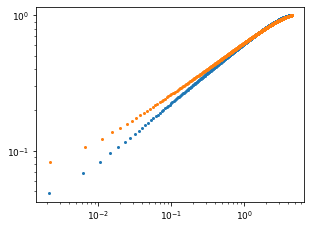

In [131]:

plt.figure(figsize=(4.8,3.6))
plt.loglog(bins_center,np.cumsum(n),'o',markersize=2)
# plt.loglog(bins_center,1.7e1*bins_center**(0.4),color='C0')
# plt.show()

# plt.figure(figsize=(4.8,3.6))
plt.loglog(bins_center1,np.cumsum(n1),'o',markersize=2,color='C1')
# plt.loglog(bins_center1,8*bins_center1**(0.33),color='C1')

# plt.ylim(0.04,3)
plt.show()


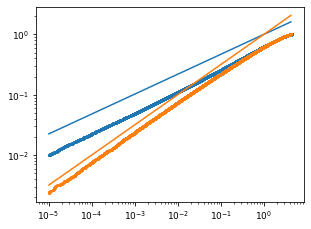

In [157]:

v1=np.sort(v1)
inds=np.argwhere(v1>1e-5)

vg=np.sort(vg)
inds_g=np.argwhere(vg>1e-5)

plt.figure(figsize=(4.8,3.6))
plt.loglog(v1[inds],inds/(N*(1+1)*Nrep),'o',markersize=2)
plt.loglog(vg[inds_g],inds_g/(N*(1+g)*Nrep),'o',markersize=2)

xplot=np.logspace(np.log10(np.min(vg[inds_g])),np.log10(np.max(vg[inds_g])))
plt.plot(xplot,xplot**0.33,color='C0')
plt.plot(xplot,xplot**0.5,color='C1')
plt.show()


In [138]:
print(inds)

[[  194]
 [  195]
 [  196]
 ...
 [52357]
 [52358]
 [52359]]
